# predict whether or not the borrower paid back their loan in full



### List of available data

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.

- days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Exploring the data

In [294]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
#ld is loan data
ld=pd.read_csv('loan_data.csv')

In [296]:
ld.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [297]:
ld.columns.tolist()

['credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [298]:
ld.info()
ld.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


(9578, 14)

### checking for duplicate rows and missing valuesin the data

In [299]:
ld.duplicated().sum()

0

In [300]:
ld.isna()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9574,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9575,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9576,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### checking for abnormal trends in data

In [301]:
ld.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [307]:
# Comparing how many people have not fully padid the loan and how many paid.
print(ld.groupby('not.fully.paid').size())

not.fully.paid
0    8045
1    1533
dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

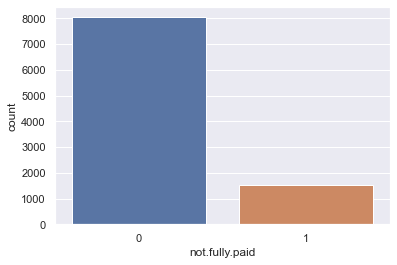

In [308]:
sns.countplot(x='not.fully.paid', data=ld)

In [309]:
#checking weather we need the feature 'purpose' or we can drop it
print(ld.groupby('purpose').size())

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

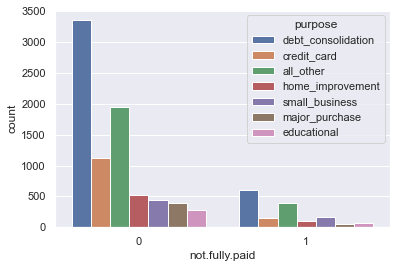

In [310]:
sns.countplot(x='not.fully.paid', hue='purpose', data=ld ,ax=None)

we can observe that almost same fraction people did not fully pay the loan in all catogeries of purpose.

so lets remove the feature purpose it

### Creating sample data

In [303]:
ld_sample=ld.sample(n=300,replace=False, weights=None, random_state=2, axis=0)

In [304]:
ld_sample

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
5539,1,debt_consolidation,0.1287,121.08,11.238436,1.58,692,3391.000000,12135,85.5,3,0,0,0
3455,1,credit_card,0.1322,202.81,10.308953,5.20,682,1684.958333,6001,31.8,0,0,0,0
3230,1,educational,0.1442,221.77,10.341742,20.48,672,2070.000000,18065,87.7,0,0,0,0
426,1,credit_card,0.1078,261.08,11.264464,16.75,692,4290.041667,50908,37.1,0,2,0,0
2101,1,debt_consolidation,0.1442,687.66,11.472103,7.09,707,4771.000000,10047,70.3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,1,credit_card,0.1474,55.26,9.210340,18.12,667,1710.000000,5704,80.3,0,0,0,0
3599,1,debt_consolidation,0.1379,170.38,10.341742,19.78,682,1229.958333,6130,57.3,3,0,0,0
6819,1,major_purchase,0.0774,312.19,10.933107,9.02,777,6514.000000,5875,7.1,1,0,0,0
7994,0,small_business,0.1059,650.90,11.532728,2.55,707,1590.041667,8702,51.7,11,0,0,0


In [305]:
ld_sample.info()
ld_sample.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 5539 to 7910
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      300 non-null    int64  
 1   purpose            300 non-null    object 
 2   int.rate           300 non-null    float64
 3   installment        300 non-null    float64
 4   log.annual.inc     300 non-null    float64
 5   dti                300 non-null    float64
 6   fico               300 non-null    int64  
 7   days.with.cr.line  300 non-null    float64
 8   revol.bal          300 non-null    int64  
 9   revol.util         300 non-null    float64
 10  inq.last.6mths     300 non-null    int64  
 11  delinq.2yrs        300 non-null    int64  
 12  pub.rec            300 non-null    int64  
 13  not.fully.paid     300 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 35.2+ KB


(300, 14)

### Correlation matrix and plots

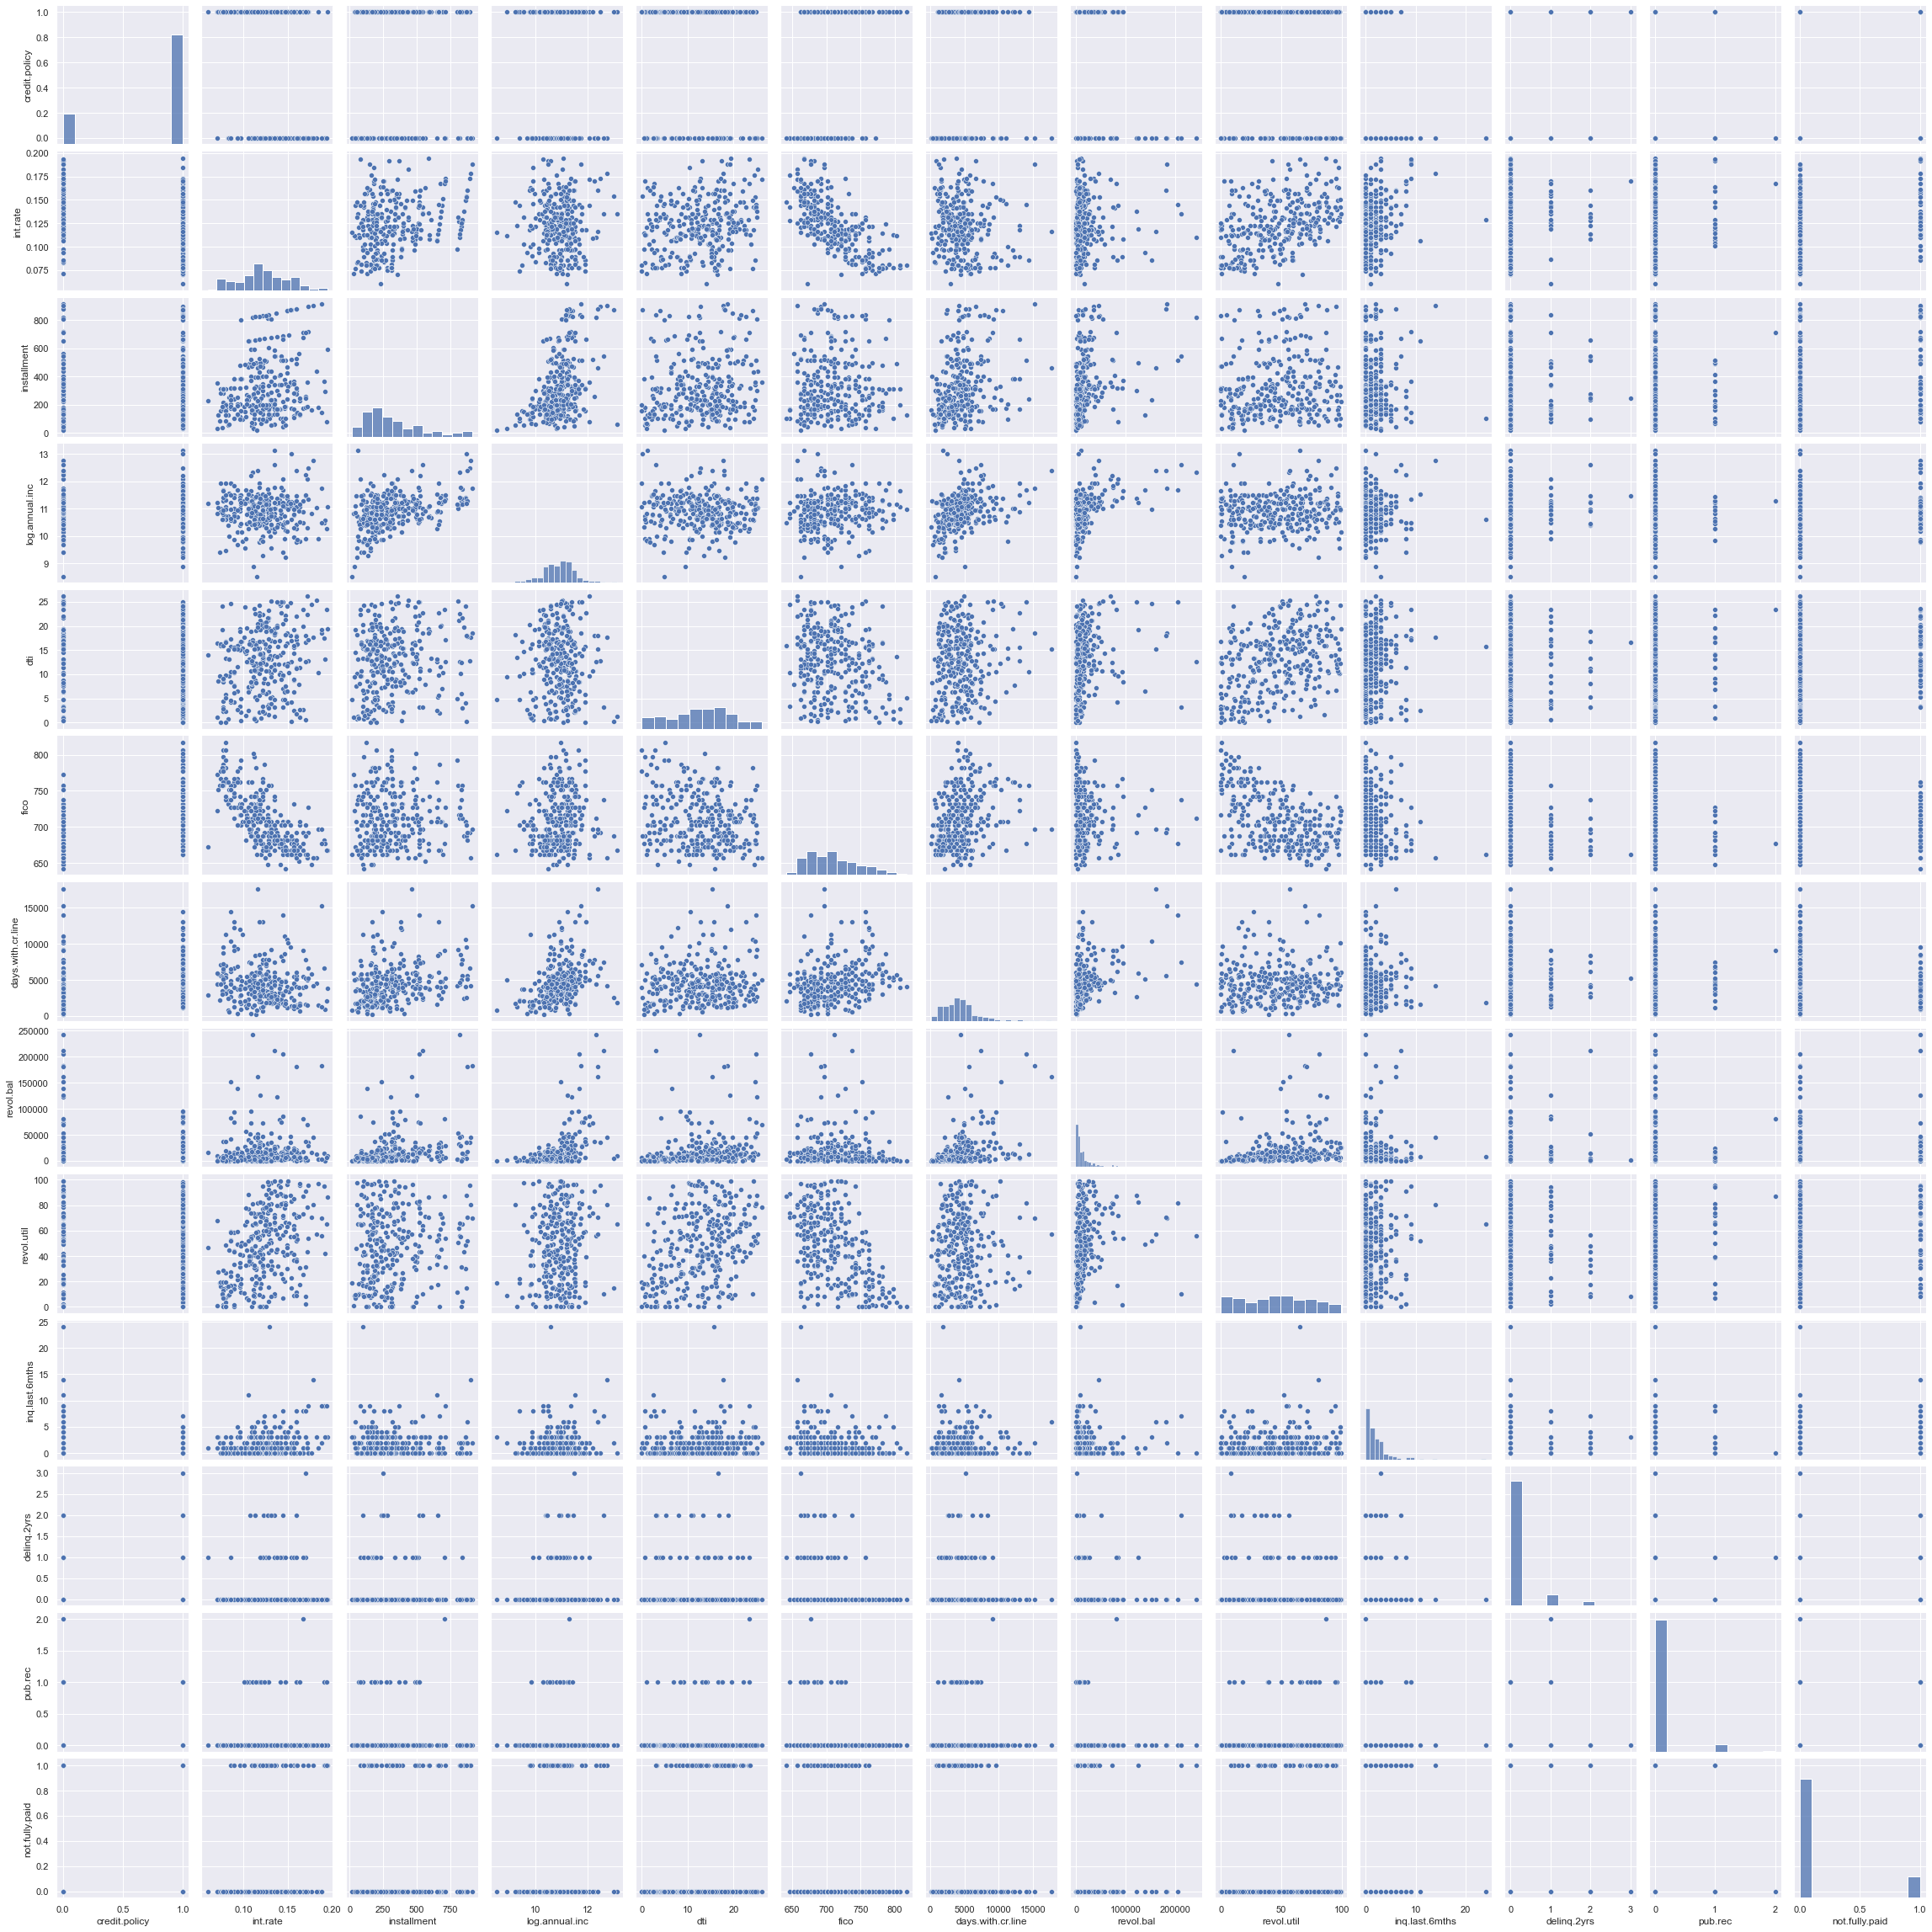

In [313]:
sns.pairplot(ld_sample)

In [315]:
ld=ld.drop(['purpose'],axis=1)

In [302]:
ld.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


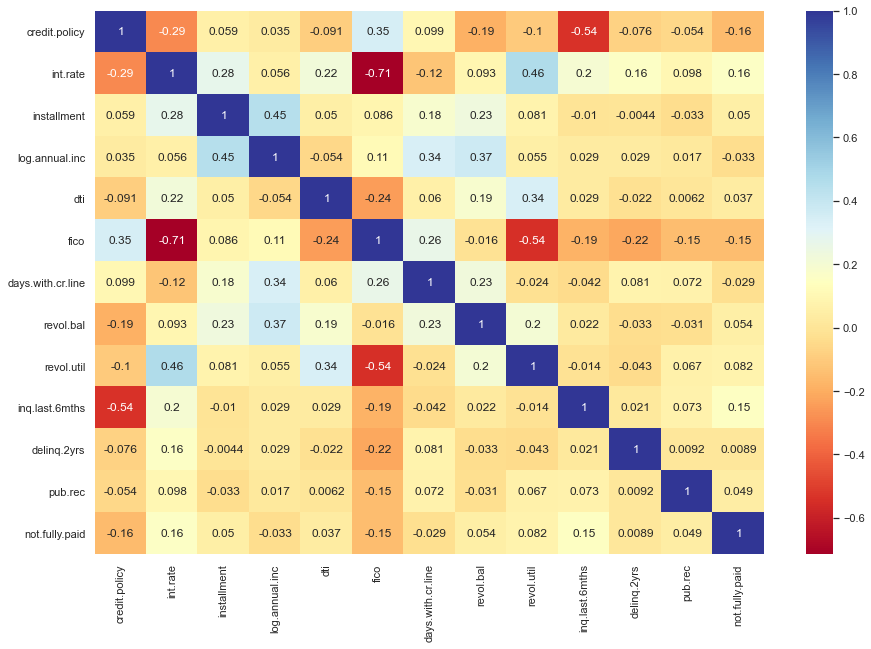

In [314]:
corrmat = ld.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(ld[top_corr_features].corr(),annot=True,cmap="RdYlBu")

We observe that,

fico score has corelations wiyh lot of other features

fico score and int.rateare highly correlated

systolic creadit.policy and inq.last.6mths are highly correlated


Text(0.5, 1.0, 'Relationship between int.rate, fico and not.fully.paid')

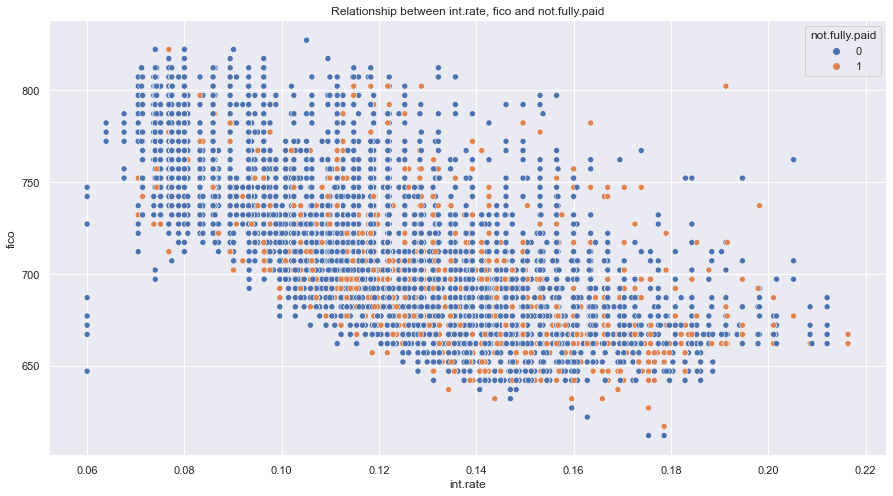

In [316]:
#corrilation between int.rate, fico score and not.fully.paid
plt.figure(figsize=(15,8))
sns.scatterplot(x='int.rate', y='fico', hue='not.fully.paid', data = ld)
plt.title('Relationship between int.rate, fico and not.fully.paid')

In [317]:
ld.shape

(9578, 13)

In [318]:
ld_sample.shape

(300, 14)

### Feature Importance

In [321]:
from sklearn.feature_selection import SelectKBest, chi2

x = ld.iloc[:, :13]
y = ld.iloc[:,-1]

bestfeatures = SelectKBest(score_func=chi2, k=10).fit(x,y)
df_featurescores = pd.DataFrame(SelectKBest(score_func=chi2, k=10).fit(x,y).scores_)
df_columns= pd.DataFrame(x.columns)
feature_scores = pd.concat([df_columns,df_featurescores],axis=1)
feature_scores.columns = ['Attribute','Score']
feature_scores= feature_scores.sort_values(by='Score', ascending=False)
feature_scores

,Attribute,Score
7,revol.bal,1.860498e+06
6,days.with.cr.line,1.119078e+04
12,not.fully.paid,8.045000e+03
2,installment,3.211572e+03
8,revol.util,1.160848e+03
9,inq.last.6mths,6.564686e+02
5,fico,4.351062e+02
4,dti,5.025229e+01
0,credit.policy,4.670311e+01
11,pub.rec,2.505498e+01


In [323]:
ld.shape

(9578, 13)

### We need to perform undersampling to overcome the problems that might occur due to the skewed nature of our Data. 

In [334]:
#Scaling the columns using Min-Max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1)) 

ld_scaled = pd.DataFrame(scaler.fit_transform(ld), columns=ld.columns)

In [335]:
from sklearn.model_selection import train_test_split

x = ld_scaled.drop(['not.fully.paid'], axis = 1)
y = ld_scaled['not.fully.paid']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=9)

In [337]:
# Comparing how many people have risk of Heart Disease and how many does'nt

risk_count = ld_scaled['not.fully.paid'].value_counts()
print('loan without Risk', risk_count[0])
print('loan with Risk', risk_count[1])

loan without Risk 8045
loan with Risk 1533


C:\Users\nanda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'loan not fully paid No/Yes'), Text(0, 0.5, 'No of borrowers')]

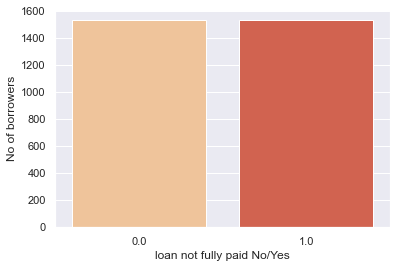

In [340]:
ld_shuffled = ld_scaled.sample(frac=1,random_state=9)

ld_notpaid = ld_shuffled.loc[ld_shuffled['not.fully.paid'] == 1]

ld_paid = ld_shuffled.loc[ld_shuffled['not.fully.paid'] == 0].sample(n=1533,random_state=42)

normalized_ld = pd.concat([ld_paid, ld_notpaid])

sns.countplot(normalized_ld['not.fully.paid'], palette="OrRd").set(xlabel="loan not fully paid No/Yes", ylabel = "No of borrowers")


## Sample model pipeline to choose the algorithm to use

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [348]:
from sklearn.model_selection import train_test_split

x = normalized_ld.iloc[:, :12]
y = normalized_ld.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=8)

In [349]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score



classifiers = [LogisticRegression(),SVC(kernel='rbf'),DecisionTreeClassifier(),KNeighborsClassifier(2), GaussianNB()]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(x_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(x_test, y_test)*100)))

The accuracy score of LogisticRegression() is: 61.73%
The accuracy score of SVC() is: 61.89%
The accuracy score of DecisionTreeClassifier() is: 57.17%
The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 55.37%
The accuracy score of GaussianNB() is: 58.79%


### We see that svc is the better options. Let's choose that 
### checking the performance through accuracy, f1_score, recall.score and precision_score

In [350]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [351]:
svm_df= SVC().fit(x_train,y_train)
svm_prediction_df = svm_df.predict(x_test)

acc = accuracy_score(y_test, svm_prediction_df)
print("The accuracy score for Support Vector Machine classifier is:", round(acc,3)*100)

f1 = f1_score(y_test, svm_prediction_df)
print("The f1 score for Support Vector Machine classifier is:", round(f1,3)*100)

precision = precision_score(y_test, svm_prediction_df)
print("The precision score for Support Vector Machine classifier is:", round(precision,3)*100)

recall = recall_score(y_test, svm_prediction_df)
print("The recall score for Support Vector Machine classifier is:", round(recall,3)*100)

The accuracy score for Support Vector Machine classifier is: 61.9
The f1 score for Support Vector Machine classifier is: 57.8
The precision score for Support Vector Machine classifier is: 66.9
The recall score for Support Vector Machine classifier is: 50.8


#####     The accuracy score for Support Vector Machine classifier is: 61.9
#####     The f1 score for Support Vector Machine classifier is: 57.8
#####     The precision score for Support Vector Machine classifier is: 66.9
#####     The recall score for Support Vector Machine classifier is: 50.8

### Cross validating the results using 5-fold cross validation

In [353]:
from sklearn.model_selection import cross_val_score

cross_val_result = cross_val_score(svm_df, x, y, cv=5) 

print ("Cross-validated scores:", cross_val_result)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cross_val_result.mean() * 100))

Cross-validated scores: [0.63680782 0.61011419 0.6182708  0.60032626 0.57748777]
The Accuracy of Model with Cross Validation is: 60.86%


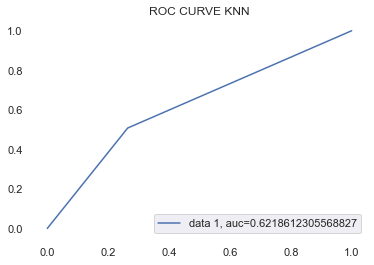

The score for the AUC ROC Curve is: 62.2%


In [354]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _= roc_curve(y_test,svm_prediction_df)
auc = roc_auc_score(y_test, svm_prediction_df)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")